Inserte la ruta de la imagen que quiera usar


 draco.png


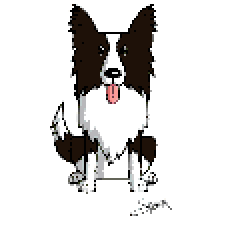

33


In [59]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import math

print('Inserte la ruta de la imagen que quiera usar')
ruta_archivo = input()
picture = Image.open(ruta_archivo)
picture = picture.convert('RGB')
nombre_archivo_terminacion = ruta_archivo.split('.')
terminacion_archivo = nombre_archivo_terminacion[-1]
nombre_archivo = nombre_archivo_terminacion[0].split('/')[-1]

# Obtener el tamaño de la imagen
width, height = picture.size
# Hacer paquetes de x pixeles
pixel_block = 2
# Variable start para el primer bucle del bucle anidado, que corresponde con la anchura
startx = 0
# Variable finish para el primer bucle del bucle anidado, que corresponde con la anchura
finishx = pixel_block
# Variable start para el segundo bucle del bucle anidado, que corresponde con la altura
starty = 0
# Variable finish para el segundo bucle del bucle anidado, que corresponde con la altura
finishy = pixel_block
# Longitud del primer bucle anidado, que corresponde con la anchura
lonx = width
# Longitud del segundo bucle anidado, que corresponde con la altura
lony = height
# Booleano para indicar que si el bucle while debe seguir. Hasta que no se llegue al último punto de la altura y anchura
# debe seguir.
keepReading = True
# Diccionario para guardar el color y las veces que se repite en los píxeles en los bloques de 8x8
pixel_colour_array = {}
# Array para guardar los colores que aparecen en la imagen y mostrar la lista con su valor de DMC asignado
colour_array = []
# Nuevo color con el que se debe reescribir la imagen. Este color será el color que más aparezca en el bloque de 8x8 píxeles
new_colour = None

# Coger los colores que hay para hilos de punto de cruz

from bs4 import BeautifulSoup
import pandas as pd
import requests

# Url usada para coger los colores de los hilos
url = 'http://my.crazyartzone.com/dmc.asp'

r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc, features='html.parser')

# Encontrar la etiqueta de la tabla y luego coger las filas (tr) y seguidamente las columnas (td)
datadiv=soup.find("table")
elementsfull =[]
row=0
for tr in datadiv.findAll("tr"):
    elements=[]
    column=0
    for td in tr.findAll("td"):
        if(td.text!=''):
            elements.append(td.text)
            column+=1
            #print('column: ', column)   

    elementsfull.append(elements)        
    #print('row: ', row)        
    row+=1
# Añadir el nombre a las columnas para luego poder buscar más fácilmente en la tabla
nombres_columnas = ['Color', 'DMC', 'Floss Name', 'Red', 'Green', 'Blue', 'RGB']
mydf = pd.DataFrame(data=elementsfull, columns=nombres_columnas)
# Borrar la primera fila que tenía las cabeceras y al pasar por el bucle queda como None, None... al ser la etiqueta th en lugar de td
mydf = mydf.iloc[1: , :]

# Crear un diccionario con los valores de Red, Green y Blue y el valor DMC
diccionario_colores = {}
for i in range(1, len(mydf)+1, 1):
    rgb_tuple = (int(mydf['Red'][i]), int(mydf['Green'][i]), int(mydf['Blue'][i]))
    diccionario_colores[rgb_tuple] = mydf['DMC'][i]

# Comenzar a reescribir la imagen
while (keepReading):
    for x in range(startx, finishx):
        for y in range(starty, finishy):
            # Color del pixel actual
            current_color = picture.getpixel( (x,y) )
            # Rellenar array de colores
            if current_color in pixel_colour_array:
                pixel_colour_array[current_color] = pixel_colour_array[current_color] + 1
            else:
                pixel_colour_array[current_color] = 1
    
    # Buscar qué color se repite más en el bucle
    max_value = max(pixel_colour_array.values())
    # Coger la clave (que es el color) a partir de su valor (las veces que se repite)
    new_colour = list(pixel_colour_array.keys())[list(pixel_colour_array.values()).index(max_value)]
    
    
    # Coger el color de la lista de colores dmc que más se parezca al color del pixel que más se repite
    # Coger el color más cercano al color del pixel usando la mínima distancia euclidea.
    def distance(c1, c2):
        (r1,g1,b1) = c1
        (r2,g2,b2) = c2
        return math.sqrt((r1 - r2)**2 + (g1 - g2) ** 2 + (b1 - b2) **2)

    # Del diccionario de colores quedarse con el color más cercano al del pixel
    colors = list(diccionario_colores.keys())
    closest_colors = sorted(colors, key=lambda color: distance(color, new_colour))
    color_pixel_dmc = closest_colors[0]
    
    # Reescribir todo el bloque de 8x8 con el color que más aparezca en el bloque
    for x in range(startx, finishx):
        for y in range(starty, finishy):
            picture.putpixel( (x,y), color_pixel_dmc)
    # Añadir color a la lista de colores de la imagen
    new_colour_dmc = diccionario_colores[color_pixel_dmc]
    if new_colour_dmc not in colour_array:
        colour_array.append(new_colour_dmc)
    # Reiniciar el diccionario y el new_colour
    pixel_colour_array = {}
    new_colour = None
    color_pixel_dmc = None
            
    # Reescribir variables de los bucles anidados
    startx = startx + pixel_block
    finishx = finishx + pixel_block
    if (finishx > lonx):
        finishx = lonx
    else:
        pass
    if (startx >= lonx):
        starty = starty + pixel_block
        finishy = finishy + pixel_block
        startx = 0
        finishx = pixel_block
        if (finishy > lony):
            finishy = lony
        else:
            pass
    else:
        pass
    if (startx == 0 and starty >=lony):
        keepReading = False
    else:
        pass
    

display(picture)
# Guardar la imagen
picture = picture.save(nombre_archivo + "_Nuevo." + terminacion_archivo)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


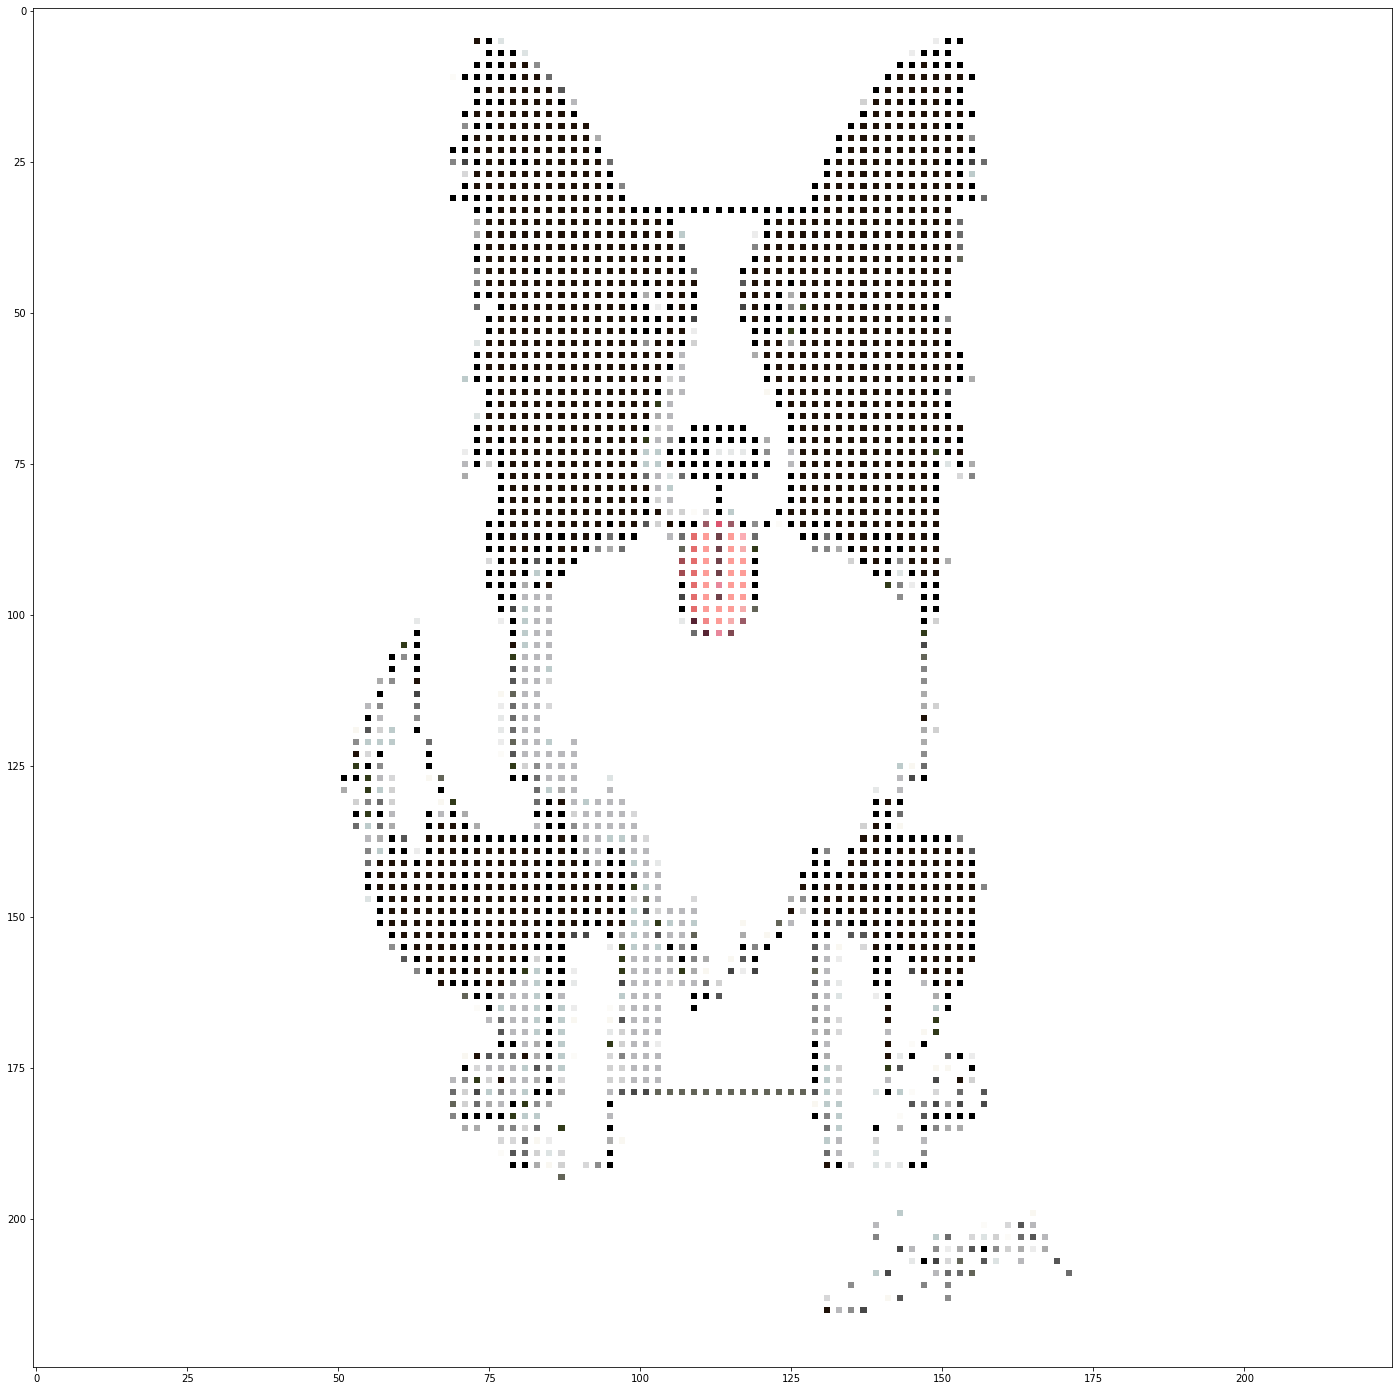

In [60]:
# Añadir grid a la imagen para diferenciar bien los puntos

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(25, 25))
img = plt.imread(nombre_archivo + "_Nuevo." + terminacion_archivo)
img_copy = img.copy()
dx, dy = pixel_block,pixel_block

grid_color = 150
img_copy[:,::dy] = grid_color
img_copy[::dx,:] = grid_color

plt.imshow(img_copy)
plt.savefig(nombre_archivo + "_Nuevo." + terminacion_archivo)

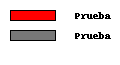

In [9]:
# Crear la lista de colores DMC que se usan en la imagen
from PIL import Image, ImageDraw

canvas = Image.new("RGB", (120,65), 'white')
img_draw = ImageDraw.Draw(canvas)
# El primer dato es esquina de arriba izquierda x
# El segundo dato es esquina de arriba izquierda y
# El tecer dato es esquina de abajo derecha x
# El cuarto dato es esquina de abajo derecha y
img_draw.rectangle((10,40,55,30), outline='black',fill=(120,120,120))
img_draw.text((75,30), 'Prueba', fill='black')
img_draw.rectangle((10,20,55,10), outline='black',fill=(256,0,0))
img_draw.text((75,10), 'Prueba', fill='black')
display(canvas)

canvas.save(nombre_archivo + "_Colores_DMC." + terminacion_archivo)

    Color   DMC         Floss Name   Red Green  Blue      RGB
0    None  None               None  None  None  None     None
1          3713  Salmon Very Light   255   226   226  #FFE2E2
2           761       Salmon Light   255   201   201  #FFC9C9
3           760             Salmon   245   173   173  #F5ADAD
4          3712      Salmon Medium   241   135   135  #F18787
..    ...   ...                ...   ...   ...   ...      ...
485          31          Blueberry    80    81   141  #50518D
486          32     Blueberry Dark    77    46   138  #4D2E8A
487          33            Fuschia   156    89   158  #9C599C
488          34       Fuschia Dark   125    48   100  #7D3064
489          35  Fuschia Very Dark    70     5    45  #46052D

[490 rows x 7 columns]


180
